In [781]:
%matplotlib inline
import numpy as np              
import pandas as pd
from sklearn import preprocessing
import math
%matplotlib inline

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline



In [782]:
# function that checks if the variable is a float
def isFloat(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [783]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [784]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


## check for missing values

In [785]:
# detect values that are NaN in each row
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

there are no missing values


since the data for HDI for year is a column completely without data, we choose to drop the whole column

In [786]:
df = df.drop(columns=['HDI for year'])

In [787]:
# we only want data from 2000 - 2010
data = df.loc[(df.year < 2011) & (df.year > 1999 )]

## clean data

first we check if all categorical data are typed correctly and are the correct amount of categories

In [788]:
df["country"].value_counts()

Netherlands               382
Austria                   382
Mauritius                 382
Iceland                   382
Puerto Rico               372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Cabo Verde                 12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [789]:
df["sex"].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [790]:
df["age"].value_counts()

35-54 years    4642
15-24 years    4642
25-34 years    4642
75+ years      4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [791]:
df["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [792]:
data["sex"].value_counts()

male      5682
female    5682
Name: sex, dtype: int64

In [793]:
data["age"].value_counts()

5-14 years     1894
25-34 years    1894
75+ years      1894
35-54 years    1894
55-74 years    1894
15-24 years    1894
Name: age, dtype: int64

next we check if all nummerical (continuous data) are numerical and string data are type string (gdp_for_year ($))

In [794]:
for val in df["year"]:
    if not str(val).isdigit():
        print(val)

In [795]:
for val in df["suicides_no"]:
    if not str(val).isdigit():
        print(val)

In [796]:
for val in df["population"]:
    if not str(val).isdigit():
        print(val)

In [797]:
for val in df["suicides/100k pop"]:
    if not isFloat(val):
        print(val)

In [798]:
for val in df[" gdp_for_year ($) "]:
    res = type(val) == str
    if res == False:
        print(res)    

In [799]:
for val in df["gdp_per_capita ($)"]:
    if not str(val).isdigit():
        print(val)

## Box plot check for outliers

although there might seem to be a lot of outliers in the following graphs, but it is due to the majority of the data being 0 so they consider numbers of suicides as outsiders and we should ignore them.

from the plot below we could at least confirm that there are no negative values in the dataset

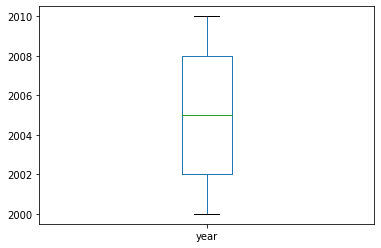

In [800]:
data["year"].plot.box()

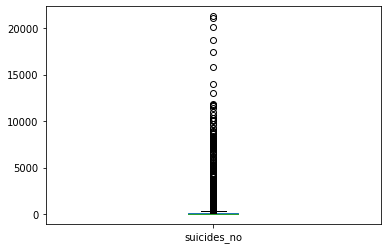

In [801]:
data["suicides_no"].plot.box()

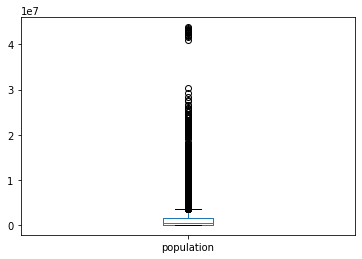

In [802]:
data["population"].plot.box()

## Drop One outlier because it significantly affects our result

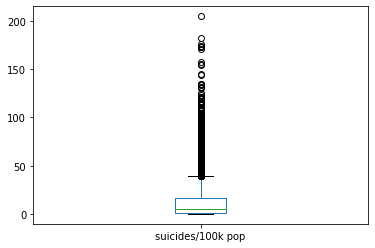

In [803]:
data["suicides/100k pop"].plot.box()

In [804]:
data = data[data["suicides/100k pop"] != 204.92]

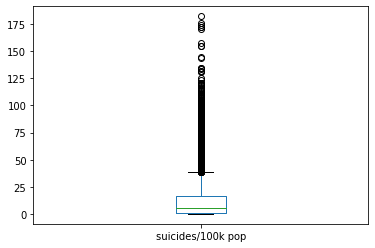

In [805]:
data["suicides/100k pop"].plot.box()

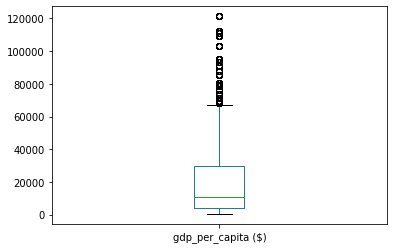

In [806]:
data["gdp_per_capita ($)"].plot.box()

## Transform Data
we choose to transform the column of population, because the data is positively skewed

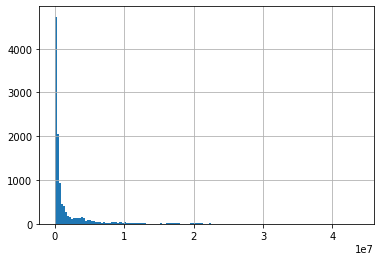

In [807]:
data['population'].hist(bins=150)

In [808]:
# as the histogram shown above, we could see that the data for charges are positively skewed, and the scale range is incredibly large,
# so we should normalize it (using min/max scaling) then perform a data transformation
x = data[['population']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC318DDD48>]],
      dtype=object)

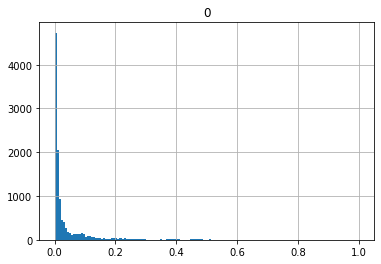

In [809]:
df_normalized.hist(bins=150)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC31B15048>]],
      dtype=object)

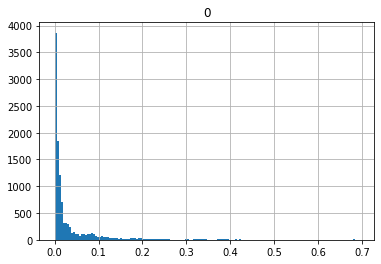

In [810]:
# we chose to do log transformation here because we do not have negative values in our dataset ,otherwise we could have done square root transformation
log_transformed_col = (df_normalized + 1).apply(np.log) # Get the log of the data

log_transformed_col.hist(bins=150) # Plot histogram

In [811]:
#the data transformation wasn't super effective due to the large skew of the data but it was 

In [812]:
# transform data
# as the histogram shown above, we could see that the data for wind_speed are positively skewed, and the scale range is incredibly large,
# so we should normalize it (using min/max scaling) then perform a data transformation
x = df[['population']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC31D2EA48>]],
      dtype=object)

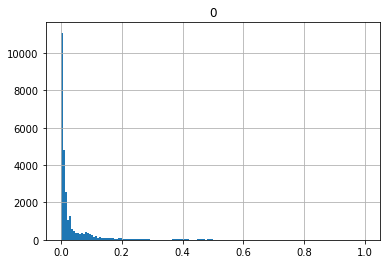

In [813]:
df_normalized.hist(bins=150)

## Using groupby('country'), we found missing values according to different countries

Therefore we choose to drop out countries that do not have samples that are more than 100


In [814]:
general = data.groupby('country').count()

In [815]:
general.reset_index()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,132,132,132,132,132,132,132,132,132,132
1,Antigua and Barbuda,120,120,120,120,120,120,120,120,120,120
2,Argentina,132,132,132,132,132,132,132,132,132,132
3,Armenia,108,108,108,108,108,108,108,108,108,108
4,Aruba,132,132,132,132,132,132,132,132,132,132
...,...,...,...,...,...,...,...,...,...,...,...
90,United Arab Emirates,72,72,72,72,72,72,72,72,72,72
91,United Kingdom,132,132,132,132,132,132,132,132,132,132
92,United States,132,132,132,132,132,132,132,132,132,132
93,Uruguay,132,132,132,132,132,132,132,132,132,132


In [816]:
countries_to_drop = general.loc[(general.year < 100)]

In [817]:
countries_to_drop

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,
Azerbaijan,72,72,72,72,72,72,72,72,72,72
Belarus,96,96,96,96,96,96,96,96,96,96
Cyprus,96,96,96,96,96,96,96,96,96,96
Georgia,96,96,96,96,96,96,96,96,96,96
Kiribati,24,24,24,24,24,24,24,24,24,24
Nicaragua,12,12,12,12,12,12,12,12,12,12
Oman,24,24,24,24,24,24,24,24,24,24
Portugal,96,96,96,96,96,96,96,96,96,96
Qatar,96,96,96,96,96,96,96,96,96,96


In [818]:
data = data[data.country != 'Azerbaijan']
data = data[data.country != 'Belarus']
data = data[data.country != 'Cyprus']
data = data[data.country != 'Georgia']
data = data[data.country != 'Kiribati']
data = data[data.country != 'Nicaragua']
data = data[data.country != 'Oman']
data = data[data.country != 'Qatar']
data = data[data.country != 'San Marino']
data = data[data.country != 'Sri Lanka']
data = data[data.country != 'Turkey']
data = data[data.country != 'United Arab Emirates']
data = data[data.country != 'Uzbekistan']

In [819]:
data.country.value_counts()

Denmark        132
Mexico         132
Germany        132
Panama         132
Spain          132
              ... 
Philippines    108
Maldives       108
Armenia        108
Fiji           108
Portugal        96
Name: country, Length: 82, dtype: int64

## Other groupby() data visualizations

In [820]:
gender = data.groupby(['country', 'sex']).sum()

In [821]:
gender = gender.drop(columns=['year'])

In [822]:
gender

suicides_no  population  suicides/100k pop  \
country             sex                                                  
Albania             female          344    15402799             163.41   
                    male            612    15303268             282.97   
Antigua and Barbuda female            0      422197               0.00   
                    male              8      381185             131.28   
Argentina           female         6904   200606407             233.46   
...                                 ...         ...                ...   
United Kingdom      male          34989   305820264             692.08   
United States       female        75622  1543261464             280.32   
                    male         291687  1488900905            1364.29   
Uruguay             female         1302    17603261             478.66   
                    male           4665    16283433            2366.60   

                            gdp_per_capita ($)  
country             sex                         
Albania             female              194010  
                    male                194010  
Antigua and Barbuda female              765072  
                    male                765072  
Argentina           female              465678  
...                                        ...  
United Kingdom      male               2682216  
United States       female             3064620  
                    male               3064620  
Uruguay             female              477480  
                    male                477480  

[164 rows x 4 columns]

In [823]:
age = data.groupby(['country', 'sex', 'age']).sum()

In [824]:
age = age.drop(columns=['year'])

In [825]:
age

suicides_no  population  suicides/100k pop  \
country sex    age                                                       
Albania female 15-24 years          102     3043003              36.58   
               25-34 years           57     2247305              27.70   
               35-54 years          107     4200481              27.93   
               5-14 years             9     3029202               3.33   
               55-74 years           45     2298317              21.38   
...                                 ...         ...                ...   
Uruguay male   25-34 years          730     2647501             303.35   
               35-54 years         1288     4280727             331.59   
               5-14 years            25     2989628               9.19   
               55-74 years         1287     2741224             516.95   
               75+ years            676      785750             950.24   

                            gdp_per_capita ($)  
country sex    age                              
Albania female 15-24 years               32335  
               25-34 years               32335  
               35-54 years               32335  
               5-14 years                32335  
               55-74 years               32335  
...                                        ...  
Uruguay male   25-34 years               79580  
               35-54 years               79580  
               5-14 years                79580  
               55-74 years               79580  
               75+ years                 79580  

[984 rows x 4 columns]

## Brief Data Visualization

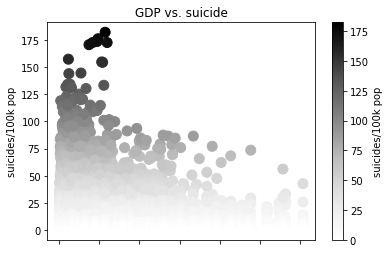

In [826]:
data.plot(kind='scatter', x='gdp_per_capita ($)', y='suicides/100k pop', c='suicides/100k pop',s=100,title="GDP vs. suicide", )


<BarContainer object of 10571 artists>

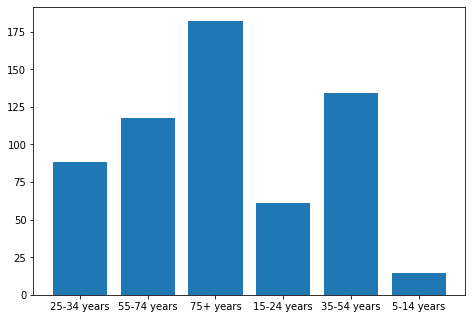

In [827]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data['age'], data['suicides/100k pop'])

,country,suicides/100k pop
0,Lithuania,40.043939
1,Republic of Korea,35.325985
2,Russian Federation,35.315455
3,Kazakhstan,31.863485
4,Guyana,30.300083
5,Hungary,29.950758
6,Latvia,27.893939
7,Slovenia,27.507424
8,Ukraine,25.692576
9,Estonia,24.384394


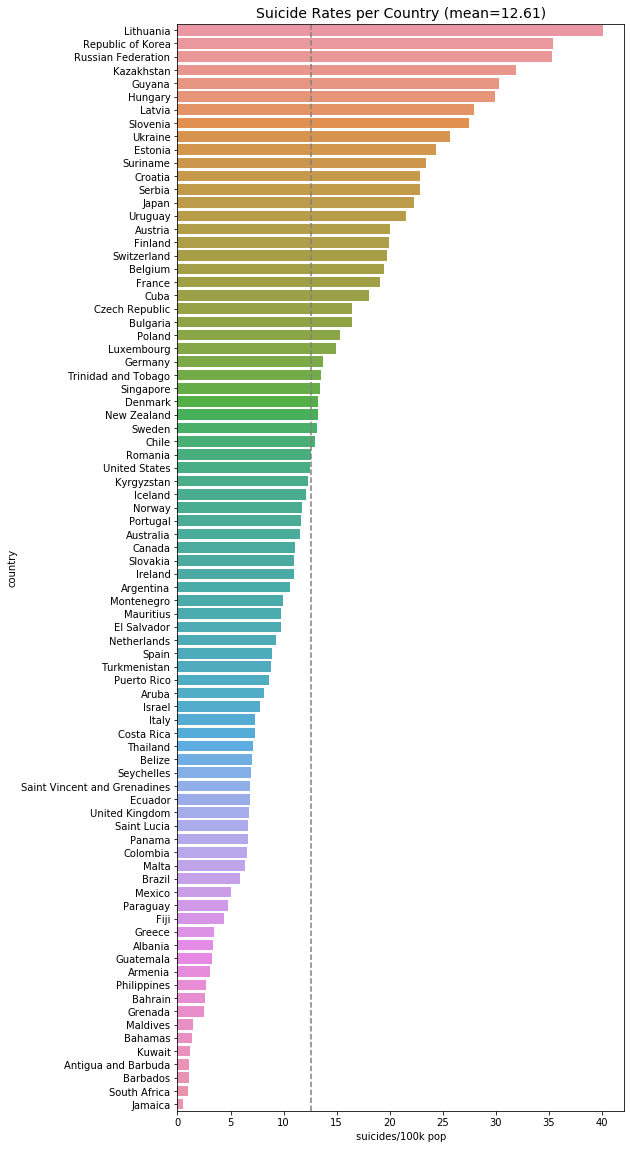

In [828]:
suicideRate = data['suicides/100k pop'].groupby(data['country']).mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,20))
plt.title('Suicide Rates per Country (mean={:.2f})'.format(suicideRate['suicides/100k pop'].mean()), fontsize=14)
plt.axvline(x=suicideRate['suicides/100k pop'].mean(),color='gray',ls='--')
sns.barplot(data=suicideRate, y='country',x='suicides/100k pop')

suicideRate.head(10)

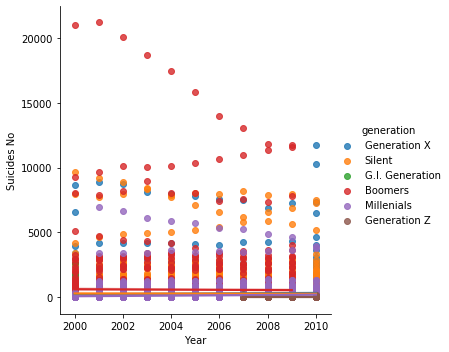

In [829]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="year", y="suicides_no", hue="generation",
               truncate=True, height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

## Examine correlations


In [830]:
data.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.004873,0.013322,-0.039254,0.227915
suicides_no,-0.004873,1.000000,0.616352,0.307318,0.057922
population,0.013322,0.616352,1.000000,0.014041,0.082302
suicides/100k pop,-0.039254,0.307318,0.014041,1.000000,0.004350
gdp_per_capita ($),0.227915,0.057922,0.082302,0.004350,1.000000


## [INVALID APPROACH] Predicting Numerical value 
features: country, year, sex, age,gdp_per_capita

target: suicides/100k pop

**Convert sex column to dummy variables**


so we could also use this to check the correlation 

In [831]:
data["gender_dummy"] = data.sex.map({'male':0, 'female':1})

**Convert country column to dummy variables**

In [832]:
# create three dummy variables using get_dummies
frame_dummies = pd.get_dummies(data["country"], prefix='country')
frame_dummies.head()

,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Bahamas,country_Bahrain,country_Barbados,...,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uruguay
132,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [833]:
# # concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
# data = pd.concat([data, frame_dummies], axis=1)
# data.head()

There are too many columns for country, and would be very impractical to set all of them as individual features and train them, therefore we should change an approach

# Predicting categorical value
features: country,	year, sex, age,gdp_per_capita


target: suicides/100k pop


In [834]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [835]:
# from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
# from sklearn.metrics import roc_auc_score

# def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_test)
#     y_test = lb.transform(y_test)
#     y_pred = lb.transform(y_pred)
#     return roc_auc_score(y_test, y_pred, average=average)

In [836]:
data["suicides/100k pop"].describe()

count    10571.000000
mean        12.756734
std         18.747711
min          0.000000
25%          0.870000
50%          5.860000
75%         16.655000
max        182.320000
Name: suicides/100k pop, dtype: float64

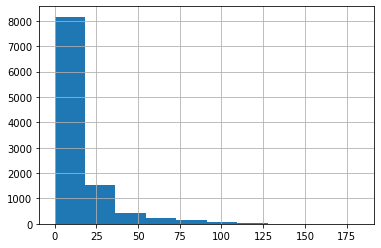

In [837]:
data["suicides/100k pop"].hist()

In [838]:
data["suicides/100k pop"].describe()

count    10571.000000
mean        12.756734
std         18.747711
min          0.000000
25%          0.870000
50%          5.860000
75%         16.655000
max        182.320000
Name: suicides/100k pop, dtype: float64

**Using label buckets for suicide/100k pop**

In [839]:
data["suicide_buckets"] = pd.cut(data["suicides/100k pop"], [0,2,5,15,200], labels=["su_0_2", "su_2_5", "su_5_15", "su_15_200"], include_lowest=True)

In [840]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,gender_dummy,suicide_buckets
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,"3,632,043,908",1299,Generation X,0,su_5_15
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,"3,632,043,908",1299,Silent,0,su_5_15
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,"3,632,043,908",1299,G.I. Generation,1,su_5_15
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,"3,632,043,908",1299,G.I. Generation,0,su_2_5
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,"3,632,043,908",1299,Generation X,1,su_2_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,Uruguay,2010,female,35-54 years,38,427551,8.89,Uruguay2010,"40,284,481,652",12882,Generation X,1,su_5_15
27504,Uruguay,2010,female,25-34 years,18,235276,7.65,Uruguay2010,"40,284,481,652",12882,Generation X,1,su_5_15
27505,Uruguay,2010,female,15-24 years,11,253651,4.34,Uruguay2010,"40,284,481,652",12882,Millenials,1,su_2_5
27506,Uruguay,2010,female,5-14 years,3,251005,1.20,Uruguay2010,"40,284,481,652",12882,Generation Z,1,su_0_2


In [841]:
data.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gender_dummy
year,1.000000,-0.004873,0.013322,-0.039254,0.227915,0.000030
suicides_no,-0.004873,1.000000,0.616352,0.307318,0.057922,-0.145588
population,0.013322,0.616352,1.000000,0.014041,0.082302,0.011241
suicides/100k pop,-0.039254,0.307318,0.014041,1.000000,0.004350,-0.401691
gdp_per_capita ($),0.227915,0.057922,0.082302,0.004350,1.000000,-0.000032
gender_dummy,0.000030,-0.145588,0.011241,-0.401691,-0.000032,1.000000


In [842]:
features = data[['country','age','country-year','sex']]

label_encode(features, features.columns.values)

target = data[['suicide_buckets']]
label_encode(target, target.columns.values)


features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 10)


C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [843]:
features

,country,age,country-year,sex
132,0,1,0,1
133,0,4,0,1
134,0,5,0,0
135,0,5,0,1
136,0,0,0,0
...,...,...,...,...
27503,81,2,880,0
27504,81,1,880,0
27505,81,0,880,0
27506,81,3,880,0


In [844]:
data.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gender_dummy
year,1.000000,-0.004873,0.013322,-0.039254,0.227915,0.000030
suicides_no,-0.004873,1.000000,0.616352,0.307318,0.057922,-0.145588
population,0.013322,0.616352,1.000000,0.014041,0.082302,0.011241
suicides/100k pop,-0.039254,0.307318,0.014041,1.000000,0.004350,-0.401691
gdp_per_capita ($),0.227915,0.057922,0.082302,0.004350,1.000000,-0.000032
gender_dummy,0.000030,-0.145588,0.011241,-0.401691,-0.000032,1.000000


**Naive Bayes**

In [845]:
nb = GaussianNB()
nb.fit(features_train, target_train)
target_pred = nb.predict(features_test)
target_pred

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [846]:
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

0.46775580395528804


In [847]:
multiclass_roc_auc_score(target_test, target_pred)

0.6149125784799309

**SVM**

In [848]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [849]:
from sklearn import svm

# instantiate model
model = svm.SVC() 

# fit model
model.fit(features_train, target_train)

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [850]:
# make class predictions for the testing set
target_pred = model.predict(features_test)
target_pred

array([0, 0, 0, ..., 0, 3, 0], dtype=int64)

In [851]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

0.64822695035461


uses multiclass fuction in order to get roc score

In [852]:
multiclass_roc_auc_score(target_test, target_pred)

0.7437079278039814

**KNN**

In [853]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [854]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
model = KNeighborsClassifier(n_neighbors=10)

# fit model
model.fit(features_train, target_train)

C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [855]:
# make class predictions for the testing set
target_pred = model.predict(features_test)
target_pred

array([0, 0, 0, ..., 0, 3, 0], dtype=int64)

In [856]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

0.5408983451536643


In [857]:
multiclass_roc_auc_score(target_test, target_pred)

0.6641507932921746

**Random forest**

In [858]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [859]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(features_train, target_train)

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [860]:
# make class predictions for the testing set
target_pred = model.predict(features_test)
target_pred

array([3, 0, 0, ..., 0, 2, 3], dtype=int64)

In [861]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))

0.7550827423167848


In [862]:
multiclass_roc_auc_score(target_test, target_pred)

0.8193951901142134

In [863]:
print(features.columns)
importances = model.feature_importances_
print(importances)

Index(['country', 'age', 'country-year', 'sex'], dtype='object')
[0.18033404 0.36881475 0.29913192 0.15171929]


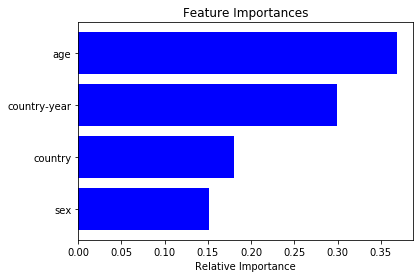

In [864]:
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**k-fold cross validation**

In [865]:
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [866]:
# Retrain model on the whole dataset
model.fit(features, target)

C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [867]:
# Perform 10-fold cross validation
kf = KFold(n_splits=4, random_state=1, shuffle=False)
scores = cross_val_score(model, features, target, cv=kf)
print('Cross-validated scores:', scores)


C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Cross-validated scores: [0.5225123  0.54786228 0.4631101  0.58667676]


C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [868]:
print(scores.mean())

0.5300403591335632


In [869]:
# Make cross validated predictions
pred = cross_val_predict(model, features, target, cv=kf)
pred

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:876: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:876: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:876: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\paige\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:876: DataConversionWarning: A column-vector y wa

array([1, 1, 3, ..., 2, 0, 0], dtype=int64)

**The highest score we could get would be using the Random Forest method**

10 fold cross validation reduced our accuracy by around 20%, so it is highly decresing our performance therefore we should not use it

SVM in our case does not take a lot of computation time since we do not have too much data and also has a decent performace



## Navie Bayes  


accuracy score : 0.46775580395528804


roc score      : 0.6149125784799309
               
               
## SVM           

accuracy score : 0.64822695035461


roc score      : 0.7437079278039814
               
               
## KNN          

accuracy score : 0.592434988179669


roc score      : 0.6992206045205351
               
               
## Random Forest 

accuracy score : 0.7550827423167848


roc score      : 0.8193951901142134


10-fold cross validation score: 0.5249345885652048


## Testing

In [870]:
data.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,gender_dummy,suicide_buckets
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,"3,632,043,908",1299,Generation X,0,su_5_15
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,"3,632,043,908",1299,Silent,0,su_5_15
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,"3,632,043,908",1299,G.I. Generation,1,su_5_15
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,"3,632,043,908",1299,G.I. Generation,0,su_2_5
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,"3,632,043,908",1299,Generation X,1,su_2_5
137,Albania,2000,male,15-24 years,5,240000,2.08,Albania2000,"3,632,043,908",1299,Generation X,0,su_2_5
138,Albania,2000,female,35-54 years,5,332200,1.51,Albania2000,"3,632,043,908",1299,Boomers,1,su_0_2
139,Albania,2000,female,25-34 years,3,245800,1.22,Albania2000,"3,632,043,908",1299,Generation X,1,su_0_2
140,Albania,2000,male,35-54 years,4,374700,1.07,Albania2000,"3,632,043,908",1299,Boomers,0,su_0_2
141,Albania,2000,male,5-14 years,1,374900,0.27,Albania2000,"3,632,043,908",1299,Millenials,0,su_0_2


In [871]:
data.head(135)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,gender_dummy,suicide_buckets
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,"3,632,043,908",1299,Generation X,0,su_5_15
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,"3,632,043,908",1299,Silent,0,su_5_15
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,"3,632,043,908",1299,G.I. Generation,1,su_5_15
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,"3,632,043,908",1299,G.I. Generation,0,su_2_5
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,"3,632,043,908",1299,Generation X,1,su_2_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Albania,2010,female,5-14 years,2,223969,0.89,Albania2010,"11,926,953,259",4359,Generation Z,1,su_0_2
263,Albania,2010,male,5-14 years,0,240939,0.00,Albania2010,"11,926,953,259",4359,Generation Z,0,su_0_2
420,Antigua and Barbuda,2000,male,55-74 years,1,3333,30.00,Antigua and Barbuda2000,"830,158,778",11021,Silent,0,su_15_200
421,Antigua and Barbuda,2000,male,35-54 years,1,10033,9.97,Antigua and Barbuda2000,"830,158,778",11021,Boomers,0,su_5_15


**Make predictions based on known inputs:**

* Predictors: 
    * Country: Albania
    * Sex: male
    * Age: 25-34 years
    * Country Year:  Albania2000
* Response:
    * Suicide/100k pop: su_5_15

**After transformation of LabelEncoder()**
the above inputs would be equivalent to the following inputs:
    
* Predictors: 
    * Country: 0
    * Age: 2
    * Country Year:  0
    * Sex: 0
* Response:
    * Suicide/100k pop: 2

**Random Forest**

In [872]:
# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(features, target)

C:\Users\paige\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\paige\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [873]:
inputs = np.array([[0, 0, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")
inputs = np.array([[0, 1, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")
inputs = np.array([[0, 2, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")
inputs = np.array([[0, 2, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [1]")
inputs = np.array([[0, 3, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [1]")
inputs = np.array([[0, 3, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [1]")
inputs = np.array([[0, 4, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")
inputs = np.array([[0, 0, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")
inputs = np.array([[1, 1, 1, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [3]")
inputs = np.array([[1, 4, 1, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")
inputs = np.array([[1, 3, 1, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")

Predicted ouctome based on known data:  [2]
Actual ouctome based on known data: [0]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [0]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [0]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [1]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [1]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [1]
Predicted ouctome based on known data:  [3]
Actual ouctome based on known data: [2]
Predicted ouctome based on known data:  [2]
Actual ouctome based on known data: [2]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [3]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [0]
Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [2]


In [874]:
inputs = np.array([[0, 1, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [0]


In [875]:
inputs = np.array([[0, 2, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [0]


In [876]:
inputs = np.array([[0, 2, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [1]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [1]


In [877]:
inputs = np.array([[0, 3, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [1]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [1]


In [878]:
inputs = np.array([[0, 3, 0, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [1]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [1]


In [879]:
inputs = np.array([[0, 4, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")

Predicted ouctome based on known data:  [3]
Actual ouctome based on known data: [2]


In [880]:
inputs = np.array([[0, 0, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")

Predicted ouctome based on known data:  [2]
Actual ouctome based on known data: [2]


In [881]:
inputs = np.array([[1, 1, 1, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [3]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [3]


In [882]:
inputs = np.array([[1, 4, 1, 0]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [0]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [0]


In [883]:
inputs = np.array([[1, 3, 1, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")

Predicted ouctome based on known data:  [0]
Actual ouctome based on known data: [2]


In [884]:
inputs = np.array([[0, 4, 0, 1]])
outcome = model.predict(inputs)
print("Predicted ouctome based on known data: ", outcome)
print("Actual ouctome based on known data: [2]")

Predicted ouctome based on known data:  [3]
Actual ouctome based on known data: [2]


In [885]:
y = [2,0,0,0,0,0,3,2,0,0,0]

In [886]:
x = [0,0,0,1,1,1,2,2,3,0,2]


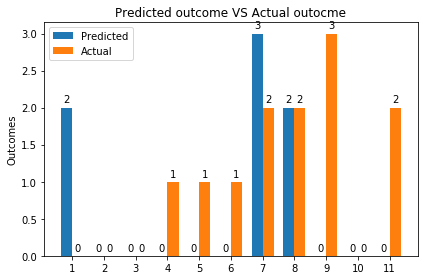

In [887]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
men_means = [2,0,0,0,0,0,3,2,0,0,0]
women_means = [0,0,0,1,1,1,2,2,3,0,2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Predicted')
rects2 = ax.bar(x + width/2, women_means, width, label='Actual')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Outcomes')
ax.set_title('Predicted outcome VS Actual outocme')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()